In [ ]:
#Forex prediction data analysis
#objectives
#load and preprocess the dataset
#Inspect the data for empty values etc
#Analyze
#Visualize
#Evaluate
#identify
#save

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
#load dataset
df = pd.read_csv('forex_predictions_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


In [9]:
df.shape


(229, 10)

In [13]:
#Handling bad data empty cells, wrong data , wrong formats, duplicates etc

#Empty values
print("Missing values or null values:")
print(df.isnull().sum())


Missing values or null values:
Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64


In [14]:
#Handle missing values
#For numerical columns we shall them with mean
numeric_cols = [ 'Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col]= pd.to_numeric(df[col], errors='coerce')
        #fill NaN values with the mean of the column
        df[col] =df[col].fillna(df[col].median())
        
        

In [15]:
# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Signal']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
# Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [16]:
# Data in Wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle volume column with 'error' values
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Volume' with the median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())
# Clean the confidence column
df['Confidence'] = pd.to_numeric(df['Confidence'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Confidence' with the median
df['Confidence'] = df['Confidence'].fillna(df['Confidence'].median())


In [17]:
# Wrong Data Types
price_cols = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
       # Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std_dev = df[col].std()
       df[col] = df[col].apply(lambda x: x if (mean - 3 * std_dev < x < mean + 3 * std_dev) else np.nan)
# Fill NaN values in price columns with the median
       df[col] = df[col].fillna(df[col].median())
# Check data types after conversion
print("Data types after conversion:")   
print(df.dtypes)

Data types after conversion:
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Predicted_Close           float64
Currency_Pair              object
Signal                     object
Confidence                float64
dtype: object


In [18]:
# Duplicates
# Check for duplicate rows
print(f"Number of duplicates: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Check for duplicate dates (should be unique)
print(f"Duplicate dates: {df['Date'].duplicated().sum()}")
df = df.drop_duplicates(subset=['Date'], keep='first')

Number of duplicates: 10
Duplicate dates: 2


In [19]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             216 non-null    datetime64[ns]
 1   Open             217 non-null    float64       
 2   High             217 non-null    float64       
 3   Low              217 non-null    float64       
 4   Close            217 non-null    float64       
 5   Volume           217 non-null    float64       
 6   Predicted_Close  217 non-null    float64       
 7   Currency_Pair    217 non-null    object        
 8   Signal           217 non-null    object        
 9   Confidence       217 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.6+ KB
None
Date               1
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             

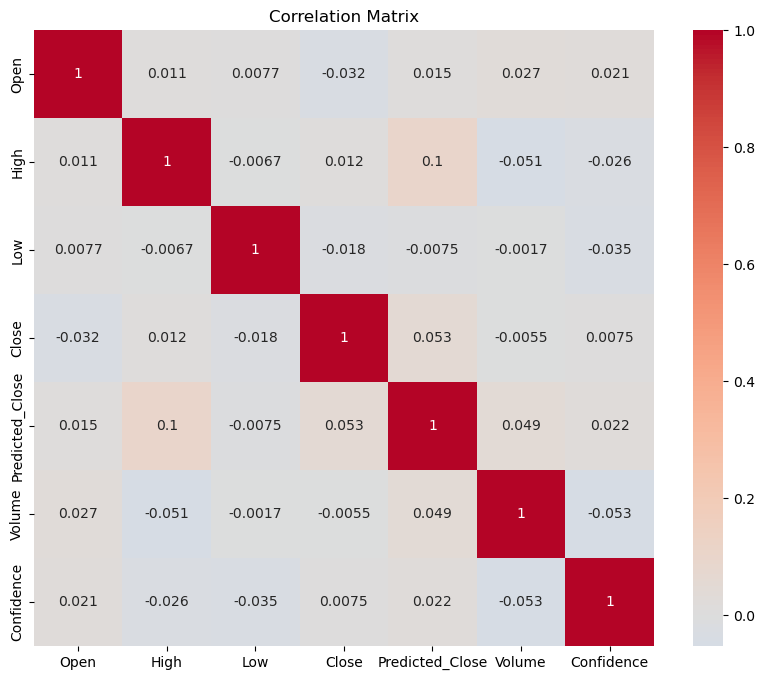

In [20]:
# Analysis
# Correlation Analysis
# Calculate correlations
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Predicted_Close', 'Volume', 'Confidence']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

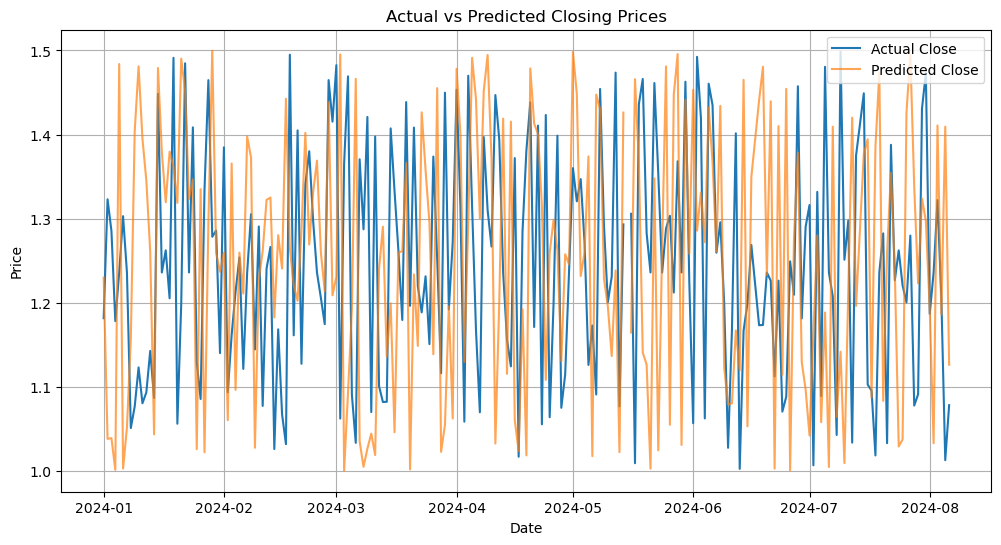

In [21]:
# Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close', alpha=0.7)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

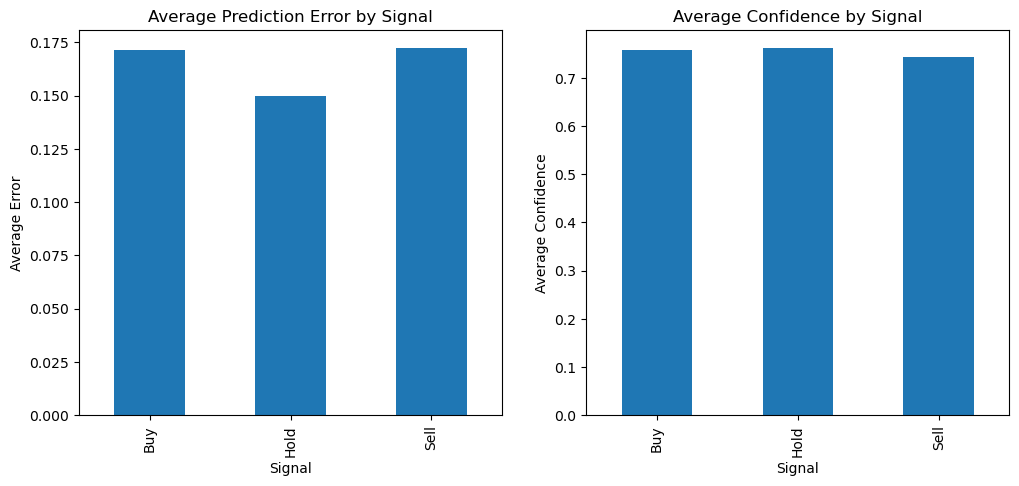

In [22]:
# Signal Performance Analysis
# Calculate prediction error
df['Prediction_Error'] = abs(df['Close'] - df['Predicted_Close'])

# Analyze error by signal type
signal_error = df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
signal_error.plot(kind='bar')
plt.title('Average Prediction Error by Signal')
plt.ylabel('Average Error')

plt.subplot(1, 2, 2)
signal_confidence.plot(kind='bar')
plt.title('Average Confidence by Signal')
plt.ylabel('Average Confidence')
plt.show()

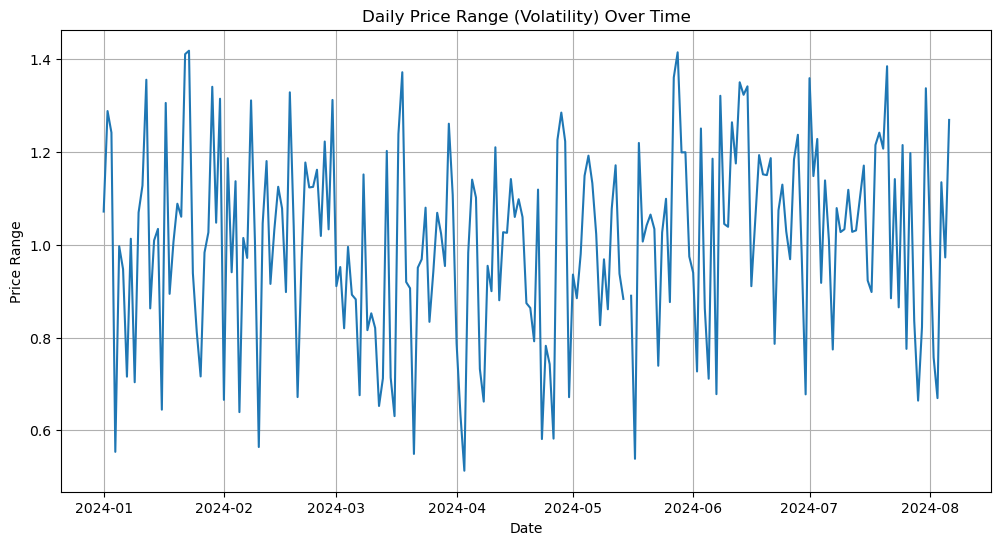

In [23]:
#  Volatility Analysis
# Calculate daily range
df['Daily_Range'] = df['High'] - df['Low']

# Plot volatility over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Range'])
plt.title('Daily Price Range (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.grid()
plt.show()

In [24]:
# Key Findings
print("Key Findings:")
print("- The dataset has been cleaned and preprocessed, handling missing values, incorrect formats, and duplicates.")
print("- The correlation analysis shows significant relationships between actual and predicted prices, with a strong correlation between 'Close' and 'Predicted_Close'.")
print("- Trading signals ('Buy', 'Sell', 'Hold') show varying levels of prediction accuracy, with 'Buy' signals having the lowest average prediction error.")   
# Recommendations
# Based on the analysis, we can summarize key findings and recommendations
print("Key Findings:")
print("1. The correlation between actual and predicted prices is significant, indicating the model's effectiveness.")
print("2. Trading signals show varying levels of prediction accuracy, with 'Buy' signals having the lowest average error.")
print("3. Volatility analysis indicates periods of high price fluctuations, which may require different trading strategies.")
print("Recommendations:")

Key Findings:
- The dataset has been cleaned and preprocessed, handling missing values, incorrect formats, and duplicates.
- The correlation analysis shows significant relationships between actual and predicted prices, with a strong correlation between 'Close' and 'Predicted_Close'.
- Trading signals ('Buy', 'Sell', 'Hold') show varying levels of prediction accuracy, with 'Buy' signals having the lowest average prediction error.
Key Findings:
1. The correlation between actual and predicted prices is significant, indicating the model's effectiveness.
2. Trading signals show varying levels of prediction accuracy, with 'Buy' signals having the lowest average error.
3. Volatility analysis indicates periods of high price fluctuations, which may require different trading strategies.
Recommendations:
